In [2]:
library(tidyverse)


── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ ggplot2 2.2.1     ✔ purrr   0.2.4
✔ tibble  1.4.1     ✔ dplyr   0.7.4
✔ tidyr   0.7.2     ✔ stringr 1.2.0
✔ readr   1.1.1     ✔ forcats 0.2.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


In [3]:
library(raster)
library(gdalUtils)

Loading required package: sp

Attaching package: ‘raster’

The following object is masked from ‘package:dplyr’:

    select

The following object is masked from ‘package:tidyr’:

    extract



In [4]:
aso_veg <- raster("aso_veg_test_only.tif")

In [5]:
aso_pred <- raster("pred_veg_test_only.tif")

In [6]:
df <- stack(aso_veg,aso_pred)

In [7]:
data_matrix <- rasterToPoints(df)

In [8]:
datafra_comb <- data_matrix %>% as.data.frame()

In [9]:
colnames(datafra_comb) <- c('x','y','aso','mlveg')

In [10]:
#doing vegetation
library(caret)

Loading required package: lattice

Attaching package: ‘caret’

The following object is masked from ‘package:purrr’:

    lift



In [11]:
confusionMatrix(datafra_comb$aso, datafra_comb$mlveg,mode = "prec_recall")

Confusion Matrix and Statistics

          Reference
Prediction         0         1
         0 117555543  79305930
         1   1278725  63177946
                                          
               Accuracy : 0.6916          
                 95% CI : (0.6916, 0.6917)
    No Information Rate : 0.5453          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4103          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
              Precision : 0.5971          
                 Recall : 0.9892          
                     F1 : 0.7447          
             Prevalence : 0.4547          
         Detection Rate : 0.4499          
   Detection Prevalence : 0.7533          
      Balanced Accuracy : 0.7163          
                                          
       'Positive' Class : 0               
                                          

In [12]:
#load the cropped vegetation layer
veg_crop <- raster("aso_veg_ch_test_only.tif")

In [13]:
#df <- stack(df,veg_crop)

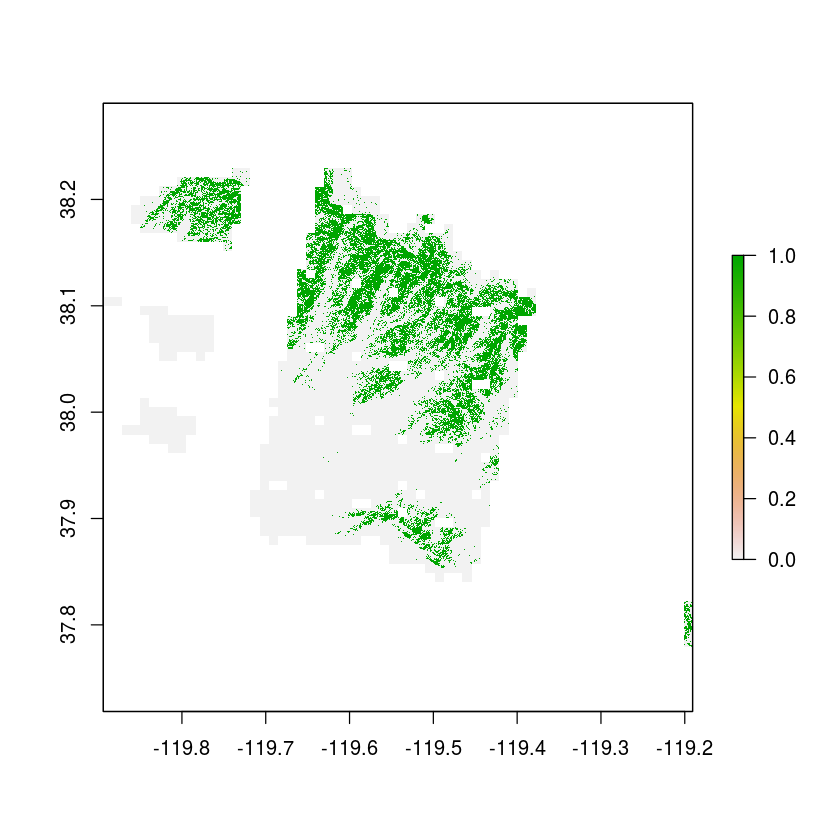

In [14]:
plot(aso_veg)

In [15]:
veg_crop_h <- veg_crop
veg_crop_h[veg_crop_h < 2] <- NA
aso_veg <- mask(aso_veg, veg_crop_h, filename="aso_vegabove2_test.tif",overwrite=TRUE)

In [16]:
aso_veg

class       : RasterLayer 
dimensions  : 26547, 32768, 869892096  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8938, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/aso_vegabove2_test.tif 
names       : aso_vegabove2_test 
values      : 0, 1  (min, max)


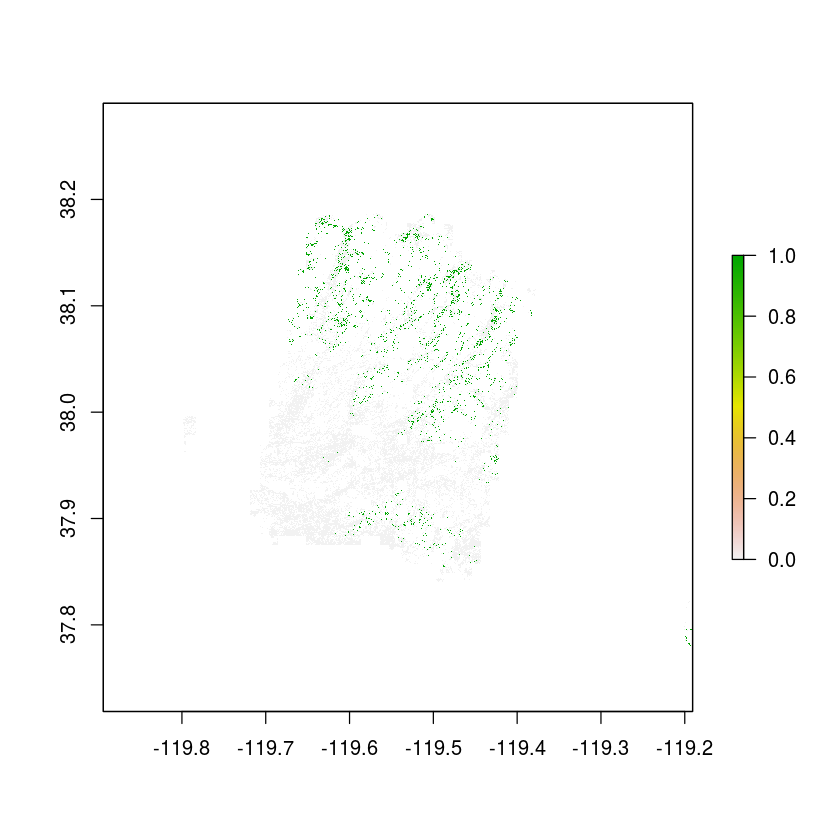

In [17]:
plot(aso_veg)

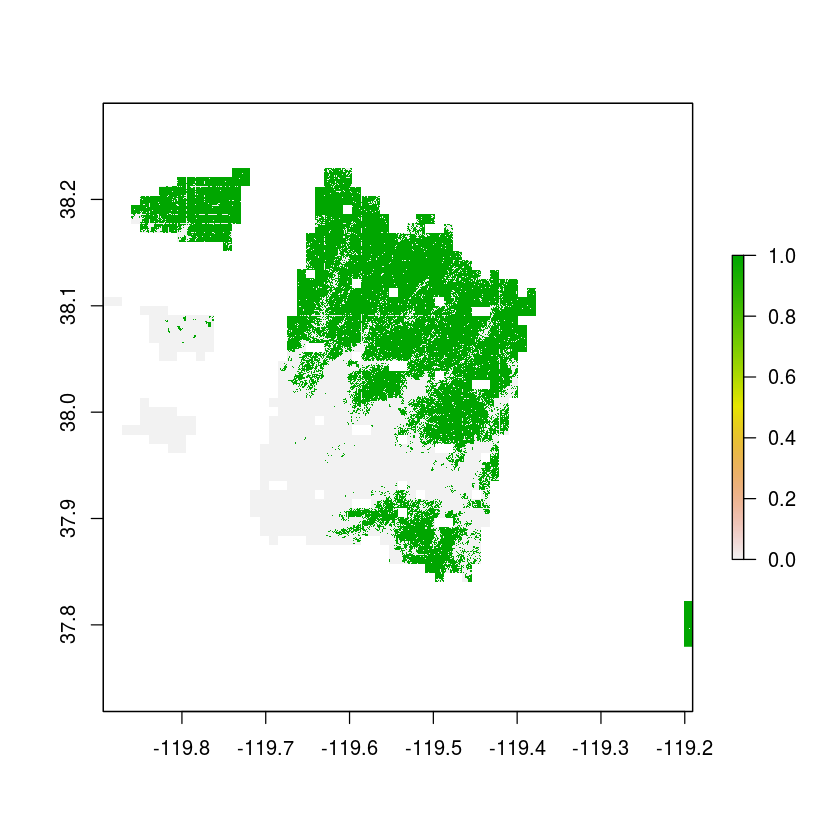

In [18]:
plot(aso_pred)

In [19]:
aso_pred <- mask(aso_pred, veg_crop_h,filename="pred_vegabove2_test.tif",overwrite=TRUE)

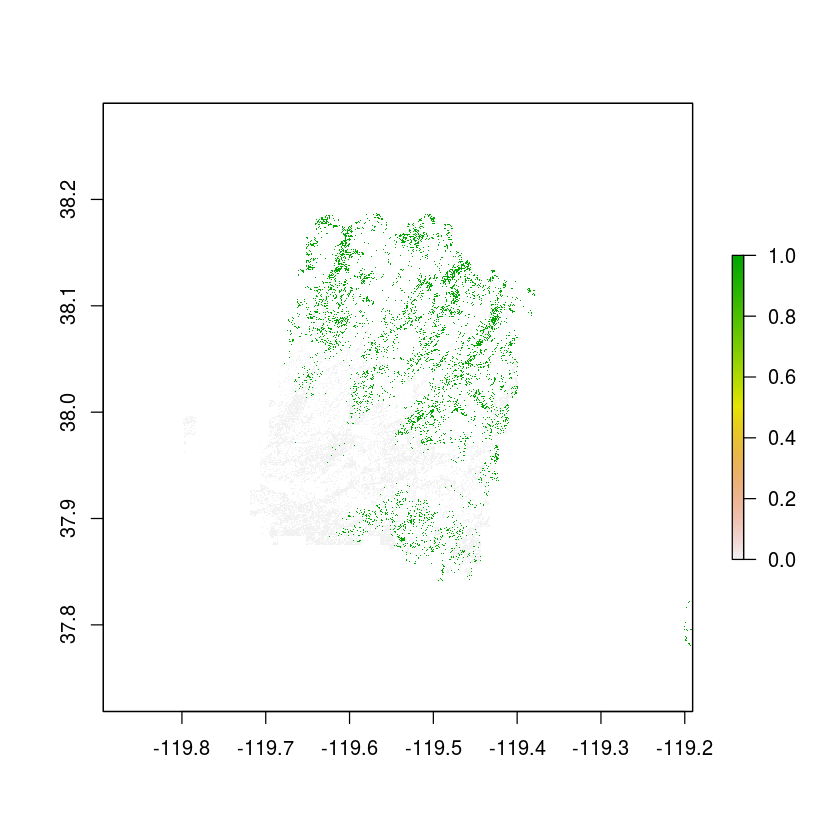

In [20]:
plot(aso_pred)

In [21]:
aso_pred

class       : RasterLayer 
dimensions  : 26547, 32768, 869892096  (nrow, ncol, ncell)
resolution  : 2.145767e-05, 1.695663e-05  (x, y)
extent      : -119.8938, -119.1907, 37.7794, 38.22955  (xmin, xmax, ymin, ymax)
coord. ref. : +proj=longlat +datum=WGS84 +no_defs +ellps=WGS84 +towgs84=0,0,0 
data source : /home/ubuntu/planet-snowcover/pipeline/pred_vegabove2_test.tif 
names       : pred_vegabove2_test 
values      : 0, 1  (min, max)


In [22]:
vals_pred <- getValues(aso_pred)

In [23]:
unique(vals_pred)

[1] NA  1  0

In [24]:
str(vals_pred)

 num [1:869892096] NA NA NA NA NA NA NA NA NA NA ...


In [25]:
vals_aso <- getValues(aso_veg)

In [26]:
length(vals_aso)

[1] 869892096

In [27]:
vals_aso_rem_na <- vals_aso[!is.na(vals_aso)]

In [28]:
length(vals_aso_rem_na)

[1] 57684047

In [29]:
vals_pred_rem_na <- vals_pred[!is.na(vals_pred)]

In [30]:
unique(vals_pred)

[1] NA  1  0

In [31]:
high_veg_perf<- confusionMatrix(vals_aso, vals_pred,mode = "prec_recall")

In [32]:
high_veg_perf

Confusion Matrix and Statistics

          Reference
Prediction        0        1
         0 41657506 10404096
         1   414906  5197175
                                          
               Accuracy : 0.8124          
                 95% CI : (0.8123, 0.8125)
    No Information Rate : 0.7295          
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.4048          
 Mcnemar's Test P-Value : < 2.2e-16       
                                          
              Precision : 0.8002          
                 Recall : 0.9901          
                     F1 : 0.8851          
             Prevalence : 0.7295          
         Detection Rate : 0.7223          
   Detection Prevalence : 0.9027          
      Balanced Accuracy : 0.6616          
                                          
       'Positive' Class : 0               
                                          

In [34]:
png(file = "veg_only.png", width = 1000, height = 400)
op <- par(mfrow=c(1,2))

par(mar=c(0,0,0,0))
plot(aso_veg)  
title('ASO - groundtruth > 2m')
par(mar=c(0,0,0,0))
plot(aso_pred)  
title('Prediction > 2m')
# 3. Close the file
dev.off()


par(op)

png 
  2